<a href="https://colab.research.google.com/github/Anubhav4989/InternSavy_Internship_Tasks/blob/main/Anubhav_Kumar_Tiwary_Task_1_Data_Science_Intern_InternSavy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 1: Use classification technique for prediction of Graduate Admissions from an Indian perspective.

Data set link: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

# **Graduate Pro: AI-based Graduate Admissions Forecasting**

In [8]:
import pandas as pd

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
data = pd.read_csv('/content/drive/MyDrive/Task 1_Dataset/Admission_Predict.csv')

**Display Top 5 Rows of the Datset**

In [12]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Check Last 5 Rows of the Dataset**

In [13]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


**Find Shape of Our Dataset (Number of Rows And Number of Columns)**

In [14]:
data.shape

(400, 9)

In [15]:
print("Number of Rows =",data.shape[0])
print("Number of Columns =",data.shape[1])

Number of Rows = 400
Number of Columns = 9


**Get Information About Our Dataset Like Total Number of Rows, Total Number of Columns, Datatypes of Each Column and Memory Usage**

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


**Check Null Values in the Dataset**

In [17]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Get Overall Statistics About the Dataset**

In [18]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


**Dropping Irrelevant Features**

In [19]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [20]:
data = data.drop('Serial No.',axis=1)

In [21]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

**Store Feature Matrix in X and Response (Target) Vector in Y**

In [22]:
data.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


In [23]:
X = data.drop('Chance of Admit ', axis = 1)

In [24]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [25]:
Y = data['Chance of Admit ']

In [26]:
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

**Splitting the Dataset into the Training set and Testing set**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [29]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [30]:
Y_train

3      0.80
18     0.63
202    0.97
250    0.74
274    0.58
       ... 
71     0.96
106    0.87
270    0.72
348    0.57
102    0.62
Name: Chance of Admit , Length: 320, dtype: float64

***CLASSIFICATION TECHNIQUE:***

In [31]:
import numpy as np

In [32]:
Y_train = [1 if value>0.8 else 0 for value in Y_train]
Y_test = [1 if value>0.8 else 0 for value in Y_test]

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [33]:
Y_train

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

**Import the Models**

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

**Model Training & Evaluation**

In [35]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred1 = lr.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, Y_pred1)*100)

Accuracy Score: 92.5


In [36]:
svm = svm.SVC()
svm.fit(X_train, Y_train)
Y_pred2 = svm.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, Y_pred2)*100)

Accuracy Score: 63.74999999999999


In [37]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred3 = knn.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, Y_pred3)*100)

Accuracy Score: 91.25


In [38]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred4 = rf.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, Y_pred4)*100)

Accuracy Score: 95.0


In [45]:
gr = GradientBoostingClassifier()
gr.fit(X_train, Y_train)
Y_pred5 = gr.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, Y_pred5)*100)

Accuracy Score: 97.5


In [46]:
final_data = pd.DataFrame({'ML_Models': ['LR', 'SVC', 'KNN', 'RF', 'GBC'],
                           'ACCURACY_SCORE': [accuracy_score(Y_test, Y_pred1)*100,
                                              accuracy_score(Y_test, Y_pred2)*100,
                                              accuracy_score(Y_test, Y_pred3)*100,
                                              accuracy_score(Y_test, Y_pred4)*100,
                                              accuracy_score(Y_test, Y_pred5)*100]})

In [47]:
print(final_data)

  ML_Models  ACCURACY_SCORE
0        LR           92.50
1       SVC           63.75
2       KNN           91.25
3        RF           95.00
4       GBC           97.50


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

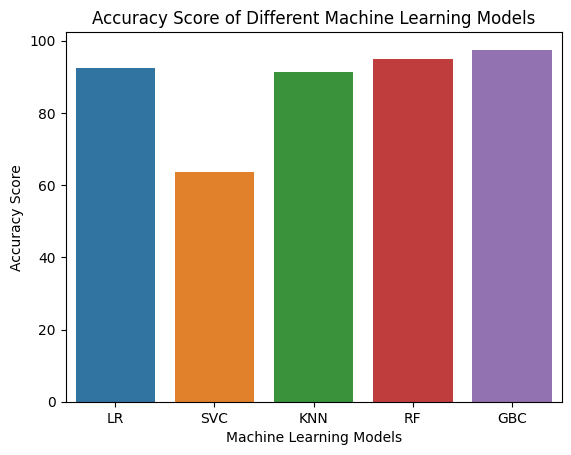

In [49]:
sns.barplot(x='ML_Models', y='ACCURACY_SCORE', data=final_data)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score of Different Machine Learning Models')
plt.show()

### **Conclusion**

- The project used classification techniques to predict Graduate Admissions from an Indian perspective.

- Gradient Boosting Classifier achieved the highest accuracy score of 97.5%, making it the top-performing algorithm.

- Random Forest Classifier also performed well with an accuracy of 95.0%.

- K-Nearest Neighbors (KNN) Classifier showed effective performance with an accuracy score of 91.25%.

- Logistic Regression provided reliable result with accuracy scores of 92.5%.

- Support Vector Classifier (SVC) had a lower accuracy score of 63.75% and may not be the best option for this task.

- Overall, classification techniques were suitable for the prediction of Graduate Admissions, with Gradient Boosting Classifier being the most accurate choice, followed by Random Forest Classifier, Logistic Regression, and K-Nearest Neighbors (KNN).
